In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Download/transformed_gpu_price.csv'
gpu_data = pd.read_csv(file_path)

gpu_data['TimeId'] = pd.to_datetime(gpu_data['TimeId'], format='%Y%m%d')

gpu_data_sorted = gpu_data.sort_values('TimeId')

split_index = int(0.8 * len(gpu_data_sorted))
train_data = gpu_data_sorted[:split_index]
test_data = gpu_data_sorted[split_index:]

basic_stats = train_data.describe()

print(basic_stats)

       ProdId    BTC_price   ETH_price   Price_USD  NVDA_stock   AMD_stock  \
count   687.0   687.000000  687.000000  687.000000  687.000000  687.000000   
mean      1.0   385.881245   61.742630  538.084583   12.035830    5.059156   
std       0.0   230.206934  108.218656   18.921171    8.545386    3.826282   
min       1.0    70.590000    0.451943  452.321347    4.258750    1.655000   
25%       1.0   220.202500    5.052500  533.927944    5.475625    2.325000   
50%       1.0   344.590000   11.215000  543.387152    7.981250    2.820000   
75%       1.0   574.265000   19.952500  549.617463   16.520000    6.862500   
max       1.0  1131.375000  390.620000  601.738413   38.973749   14.950000   

              PPI  
count  687.000000  
mean    57.842940  
std      0.637898  
min     56.600000  
25%     57.400000  
50%     57.600000  
75%     58.400000  
max     58.800000  


In [18]:
gpu_data.head()

,ProdId,TimeId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI
0,1,2014-09-17,123.000,1.300,601.738413,4.79125,3.840,58.8
1,1,2014-09-18,125.015,1.365,551.885277,4.83375,3.820,58.8
2,1,2014-09-19,129.785,1.305,548.098896,4.82125,3.875,58.8
3,1,2014-09-22,131.060,1.260,547.933078,4.79250,3.790,58.8
4,1,2014-09-23,133.310,1.270,548.146817,4.71750,3.740,58.8


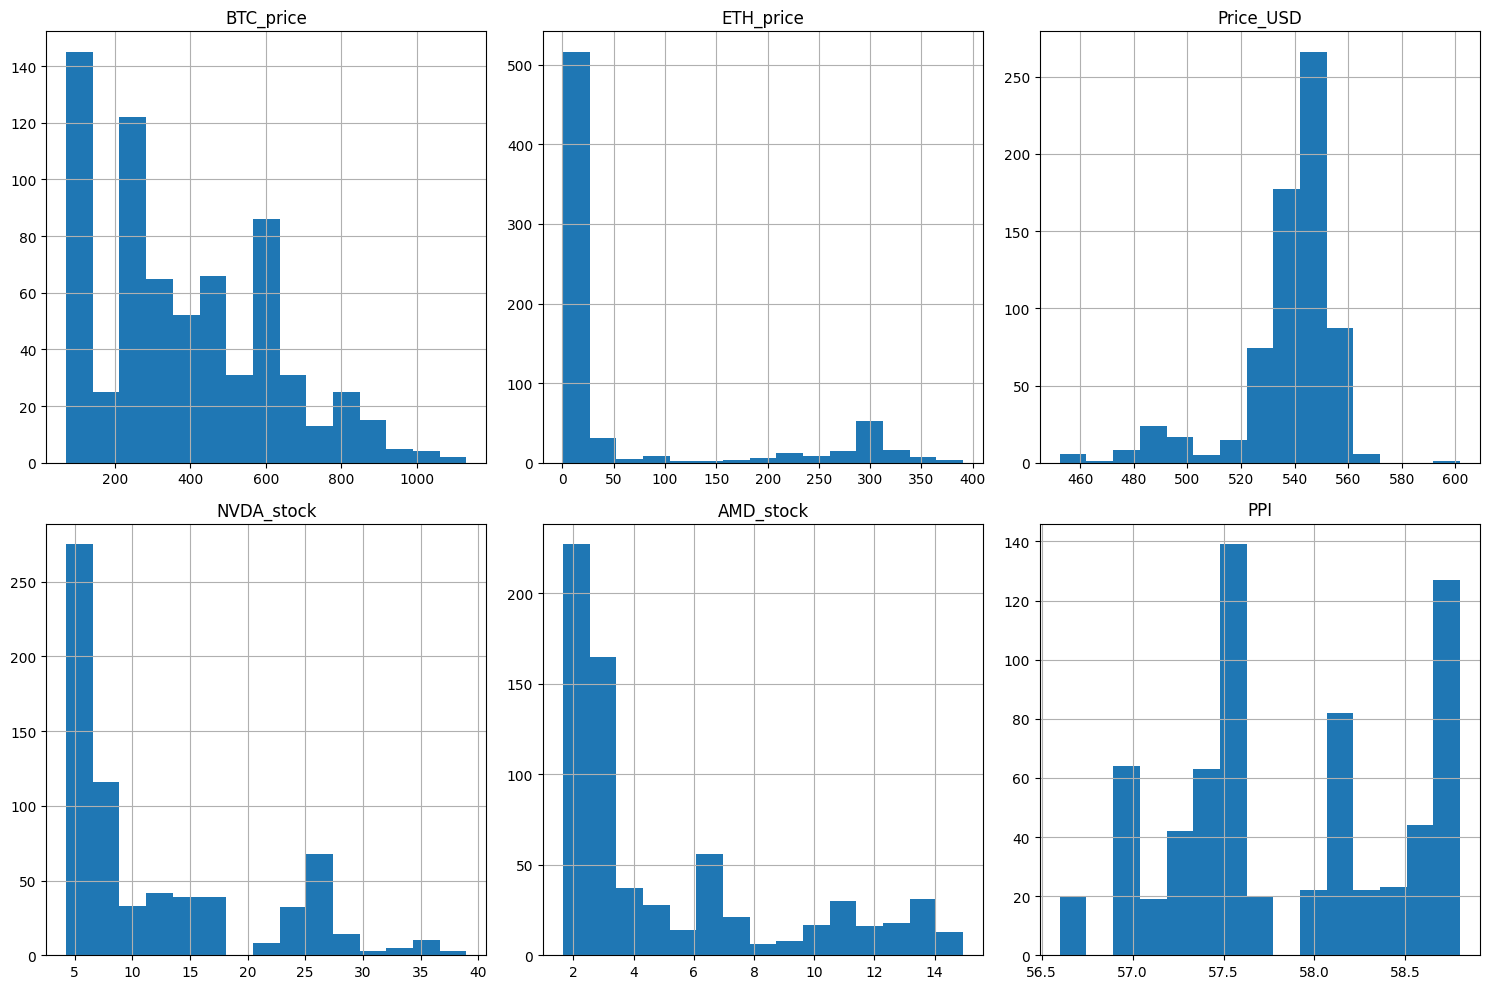

In [19]:
train_data_hist = train_data.drop(columns=['ProdId', 'TimeId'])
train_data_hist.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()

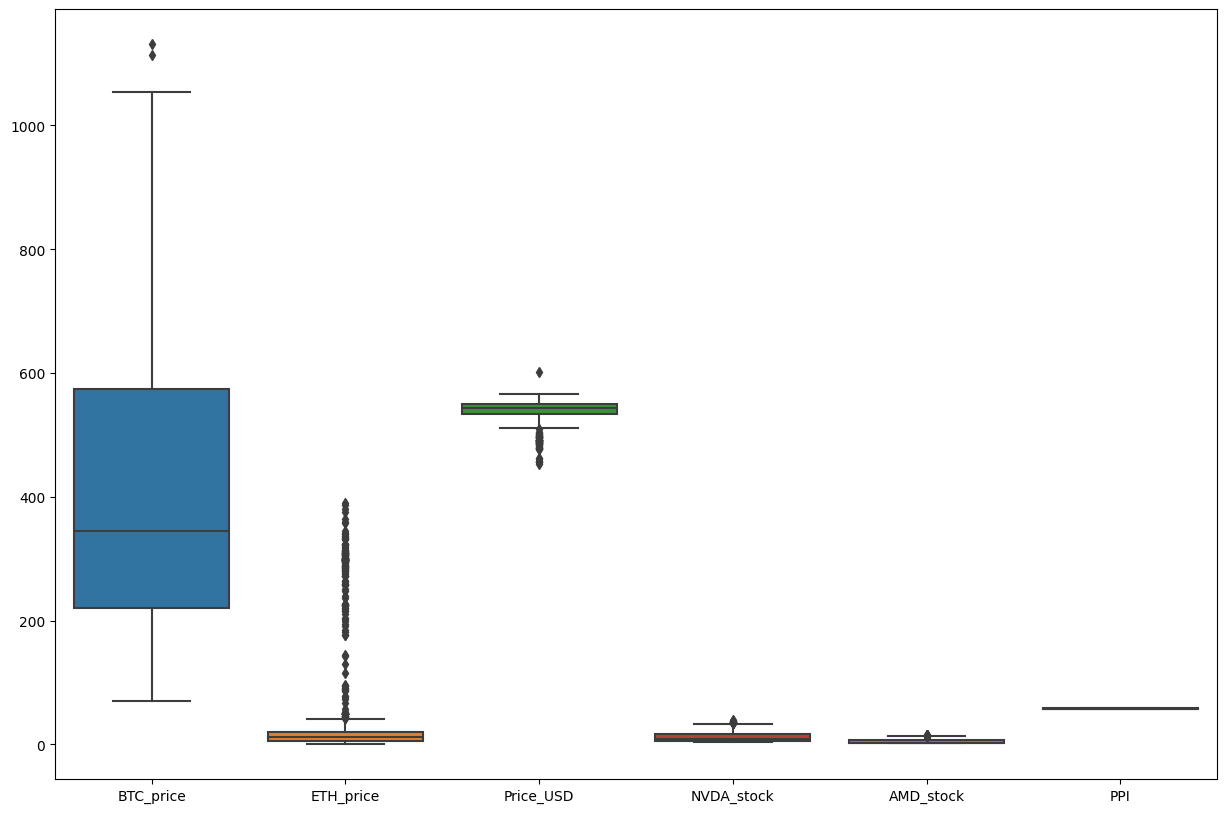

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data_hist)
plt.show()

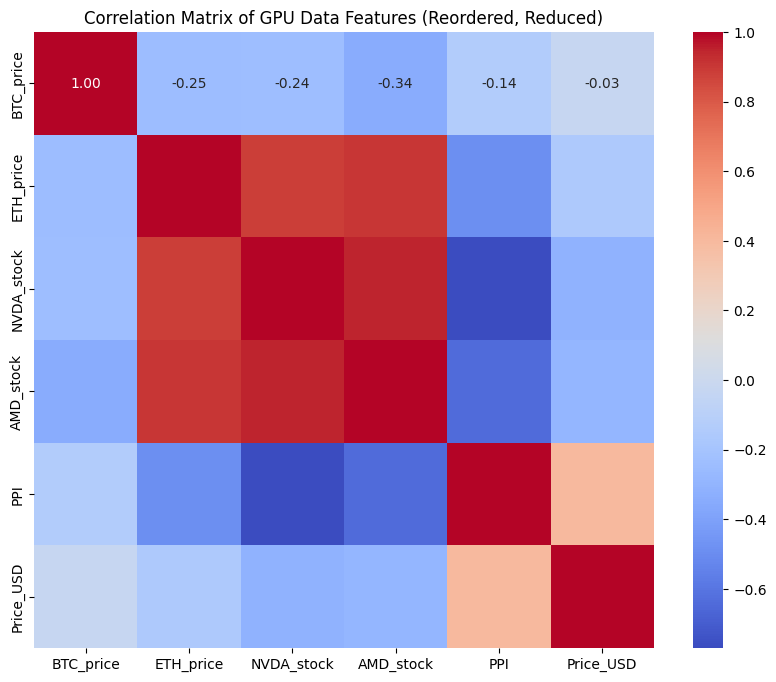

In [21]:
cols_reduced = list(train_data_hist.columns)
cols_reduced.append(cols_reduced.pop(cols_reduced.index('Price_USD'))) 
cols_reduced.insert(-1, cols_reduced.pop(cols_reduced.index('PPI')))

gpu_data_reordered_reduced = train_data_hist[cols_reduced]

correlation_matrix_reordered_reduced = gpu_data_reordered_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reordered_reduced, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of GPU Data Features (Reordered, Reduced)")
plt.show()

In [16]:
import pandas as pd

missing_values = train_data.isnull().sum()

Q1 = train_data['Price_USD'].quantile(0.25)
Q3 = train_data['Price_USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data.loc[:, 'Price_USD'] = train_data['Price_USD'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

train_data_cleaned = train_data.dropna()

train_data_cleaned.loc[:, 'Price_USD'] = train_data_cleaned['Price_USD'].apply(
    lambda x: x if lower_bound <= x <= upper_bound else None
)

train_data_cleaned.loc[:, 'BTC_volatility'] = train_data_cleaned['BTC_price'].rolling(window=7).std()
train_data_cleaned.loc[:, 'ETH_volatility'] = train_data_cleaned['ETH_price'].rolling(window=7).std()

train_data_final = train_data_cleaned.dropna()

train_data_final.head()

C:\Users\dhwan\AppData\Local\Temp\ipykernel_22836\2946327228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'Price_USD'] = train_data['Price_USD'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)
C:\Users\dhwan\AppData\Local\Temp\ipykernel_22836\2946327228.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned.loc[:, 'Price_USD'] = train_data_cleaned['Price_USD'].apply(
C:\Users\dhwan\AppData\Local\Temp\ipykernel_22836\2946327228.py:19: SettingWithCopy

,ProdId,TimeId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI,BTC_volatility,ETH_volatility
7,1,2014-09-29,130.125,1.275000,545.526037,4.64750,3.635,58.8,2.573347,0.037161
8,1,2014-09-30,129.625,1.255000,547.592340,4.60875,3.600,58.8,1.597886,0.027903
9,1,2014-10-01,128.150,1.230000,548.326211,4.60125,3.490,58.8,1.792832,0.033166
10,1,2014-10-02,128.490,1.180000,549.238244,4.60375,3.360,58.8,1.817745,0.049135
11,1,2014-10-06,122.225,1.055338,550.801413,4.51250,3.360,58.8,2.739697,0.092397


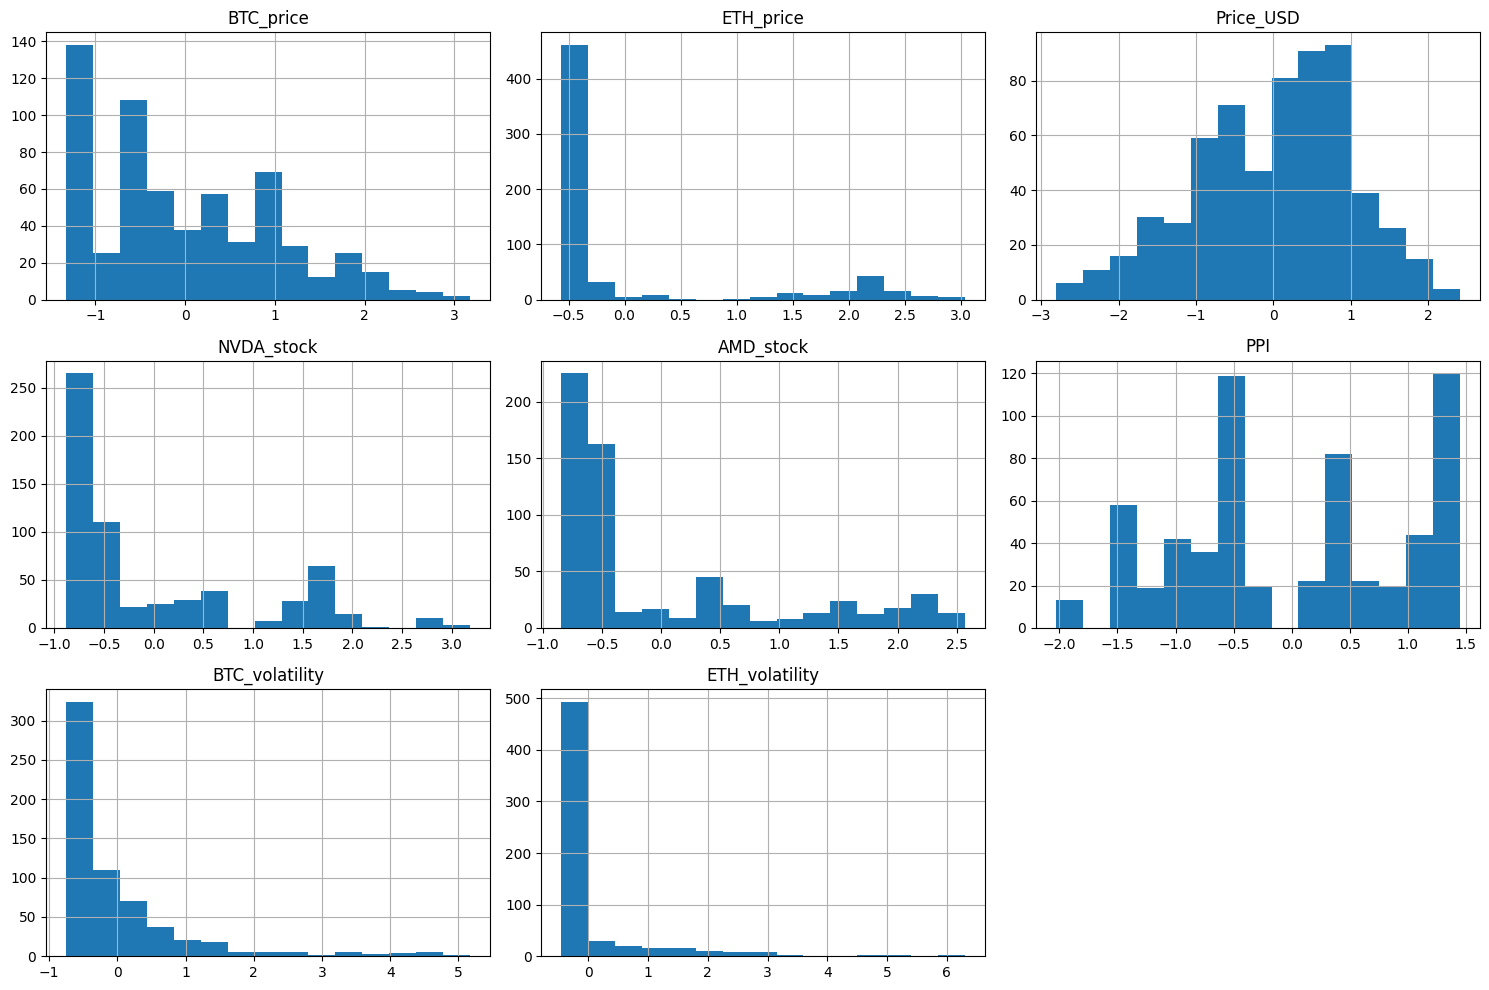

In [15]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaling_features = ['BTC_price', 'ETH_price', 'Price_USD', 'NVDA_stock', 'AMD_stock', 'PPI', 
                    'BTC_volatility', 'ETH_volatility']

scaler = StandardScaler()

train_data_scaled = train_data_final.copy()
train_data_scaled[scaling_features] = scaler.fit_transform(train_data_final[scaling_features])

train_data_scaled_hist = train_data_scaled[scaling_features]
train_data_scaled_hist.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

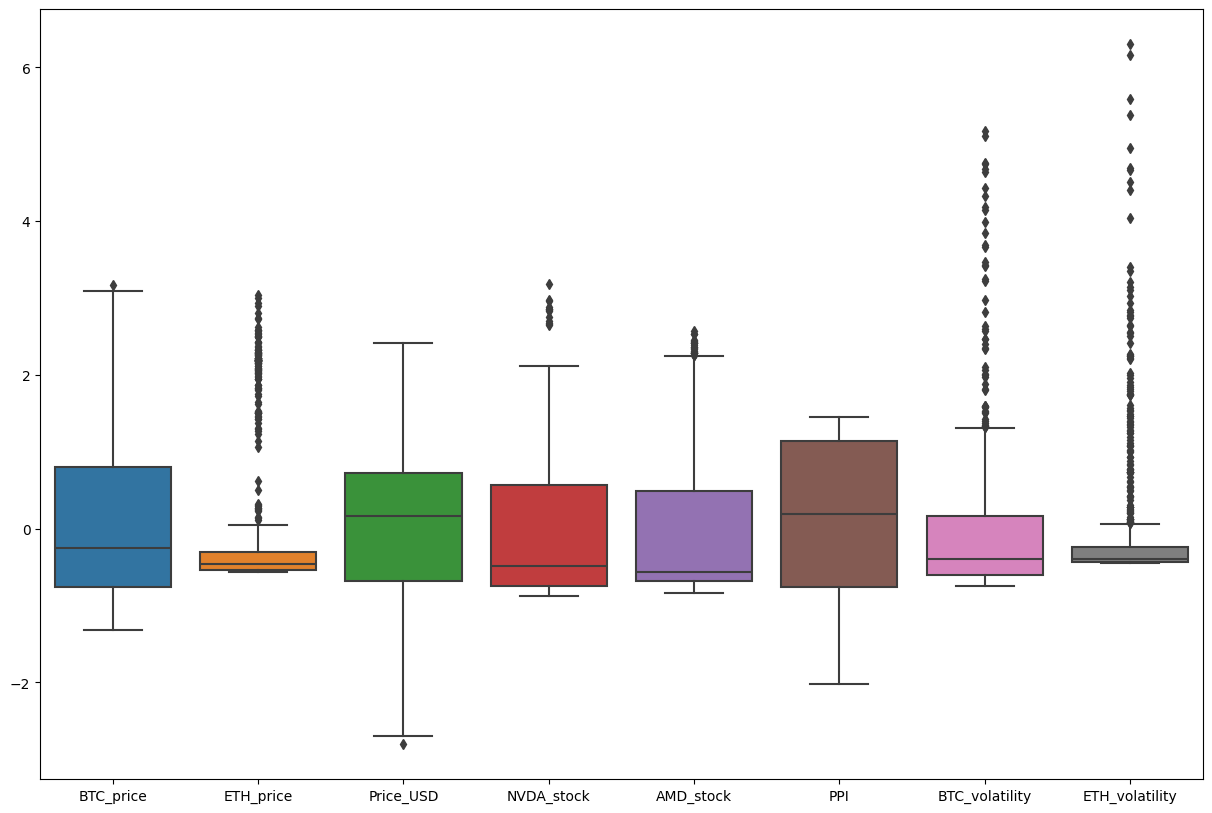

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data_scaled_hist)
plt.show()

In [17]:
scaled_data_stats = train_data_scaled.describe()

scaled_data_stats

,ProdId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI,BTC_volatility,ETH_volatility
count,617.0,6.170000e+02,617.000000,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02,6.170000e+02
mean,1.0,-9.212872e-17,0.000000,-1.121667e-14,4.606436e-17,1.381931e-16,-1.197673e-14,6.909654e-17,-4.606436e-17
std,0.0,1.000811e+00,1.000811,1.000811e+00,1.000811e+00,1.000811e+00,1.000811e+00,1.000811e+00,1.000811e+00
min,1.0,-1.323597e+00,-0.565115,-2.804227e+00,-8.807053e-01,-8.424375e-01,-2.027459e+00,-7.499155e-01,-4.515636e-01
25%,1.0,-7.625039e-01,-0.540889,-6.886043e-01,-7.430644e-01,-6.793864e-01,-7.632425e-01,-5.979916e-01,-4.394526e-01
50%,1.0,-2.473085e-01,-0.464555,1.611500e-01,-4.892845e-01,-5.638383e-01,1.849198e-01,-3.910661e-01,-4.016142e-01
75%,1.0,8.062856e-01,-0.304913,7.211279e-01,5.605013e-01,4.915006e-01,1.133082e+00,1.667650e-01,-2.413066e-01
max,1.0,3.172036e+00,3.038414,2.409241e+00,3.181528e+00,2.567514e+00,1.449136e+00,5.166077e+00,6.299766e+00
